In [20]:
from yfetch import get_option_chains, get_stock_history
from datetime import date

symbol = "SPMO"
option_chains = get_option_chains(symbol)
stock_history = get_stock_history(symbol, interval='1wk')

Fetched history for SPMO (261 rows)


Symbol: SPMO
Date: 2025-09-12
Stock Price: 120.48


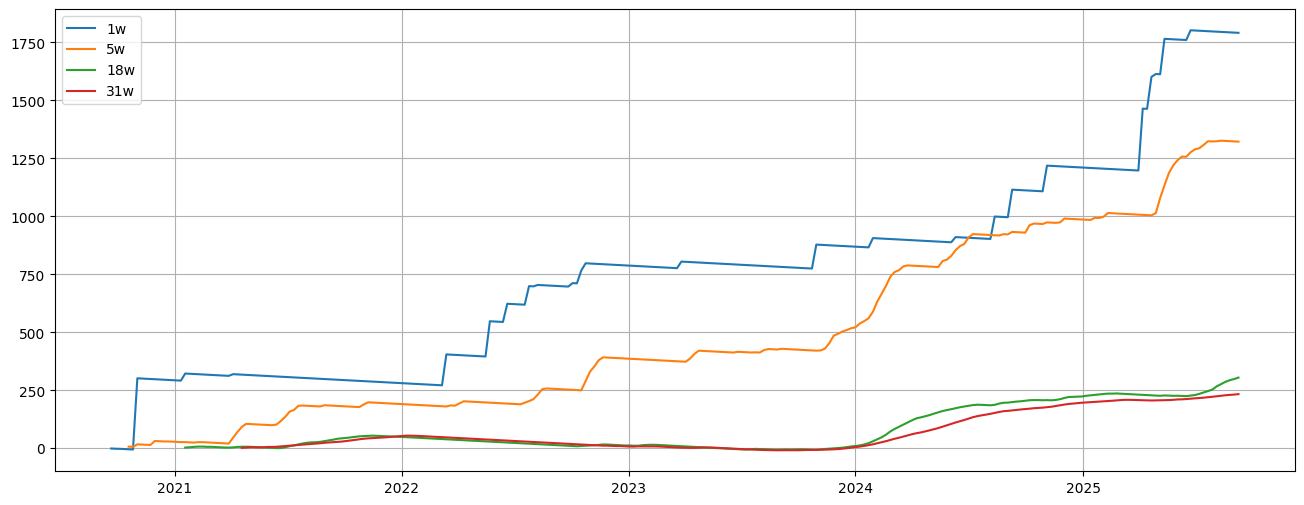

,rcp,gap,mean_profit,median_profit,positive,std_profit,ratio,quarter_m
weeks,,,,,,,,
1,0.000200,0.037517,6.890250,-1.000000,0.088462,34.350415,0.200587,2.151355
5,0.002400,0.037517,5.165256,-1.000000,0.363281,11.171884,0.462344,3.576665
18,0.026000,0.037517,1.254642,0.153428,0.510288,2.988440,0.419832,0.178479
31,0.064463,0.004316,1.014949,0.897714,0.617391,1.901365,0.533800,0.687502


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

print(f"Symbol: {option_chains.symbol}")
print(f"Date: {option_chains.market_date}")
print(f"Stock Price: {option_chains.stock_price}")

stock_price = option_chains.stock_price
market_date = option_chains.market_date

plt.figure(figsize=(16,6))

results = []
for expiry, chain in option_chains.chains.items():
    expiry_date = date.fromisoformat(expiry)
    weeks = round((expiry_date - market_date).days / 7)

    strike, call_price = chain.get_otm_calls()[0]
    rcp = call_price / strike  # relative call price
    gap = strike / stock_price - 1

    change = stock_history['Close'].pct_change(periods=weeks).dropna()

    call_profit = ((change - gap) / rcp - 1).clip(lower=-1) #/ weeks # per week profit
    plt.plot(call_profit.cumsum(), label=f"{weeks}w")

    mean_profit = call_profit.mean()
    median_profit = call_profit.median()
    std_profit = call_profit.std()
    quarter_m = call_profit.rolling(window=13).mean().median()

    results.append({
        'weeks': weeks,
        'rcp': rcp,
        'gap': gap,
        'mean_profit': mean_profit,
        'median_profit': median_profit,
        'positive': (call_profit > 0).mean(),
        'std_profit': std_profit,
        'ratio': mean_profit / std_profit,
        'quarter_m': quarter_m,
    })

plt.legend()
plt.grid()
plt.show()

df = pd.DataFrame(results).set_index('weeks')
display(df)

<Axes: xlabel='weeks'>

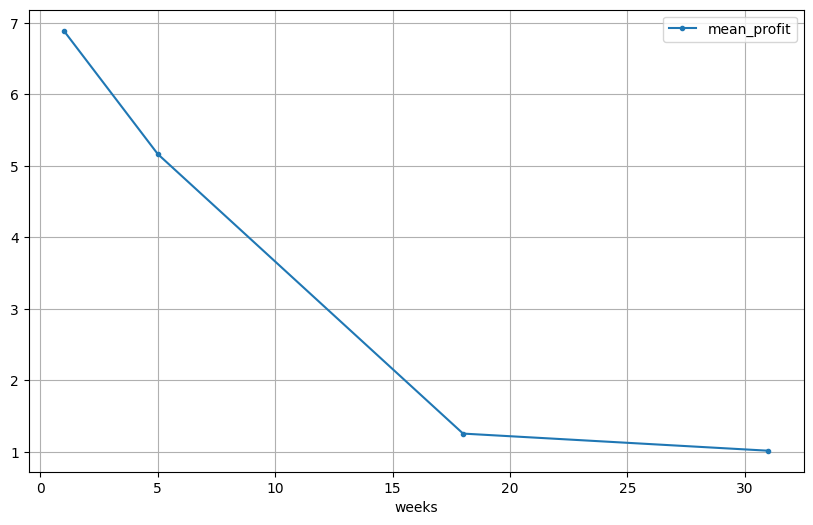

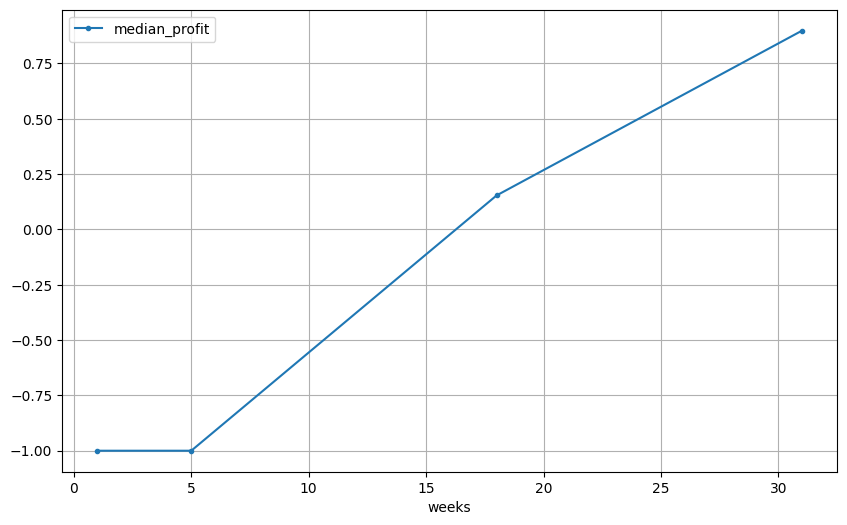

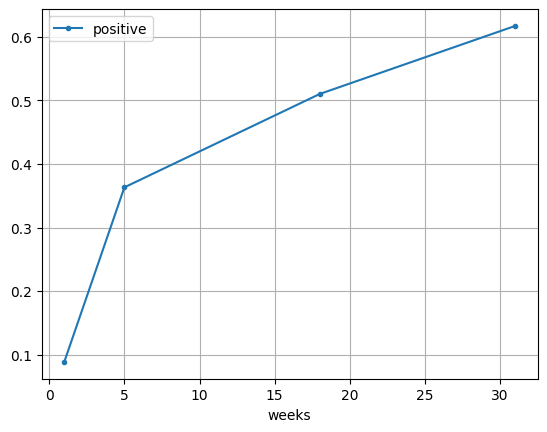

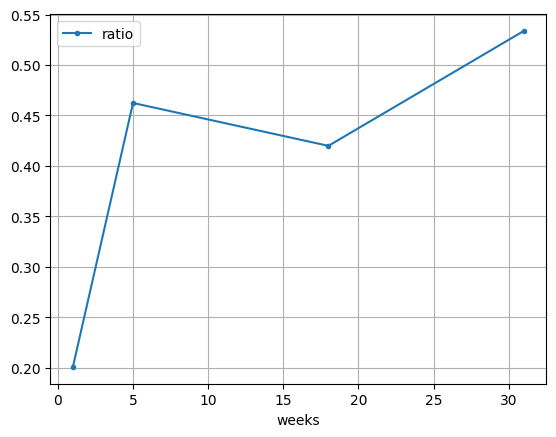

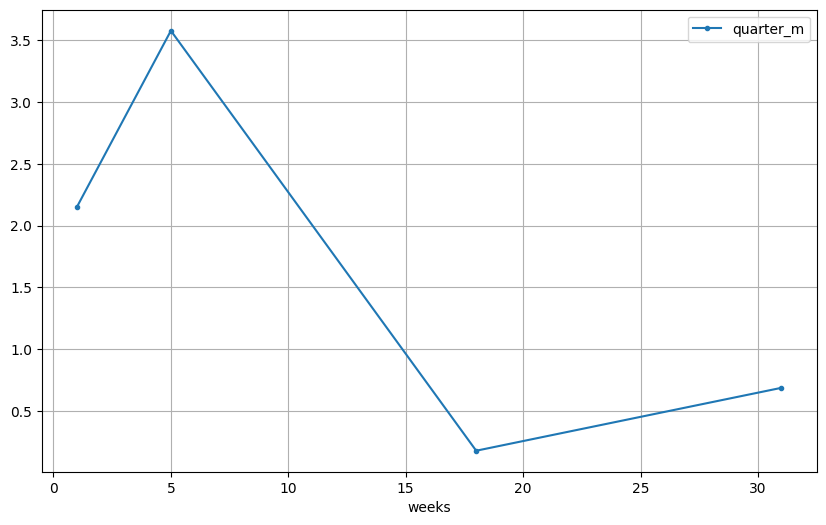

In [22]:
df.plot(y='mean_profit', marker=".", grid=True, figsize=(10,6))
df.plot(y='median_profit', marker=".", grid=True, figsize=(10,6))
df.plot(y='positive', marker=".", grid=True)
df.plot(y='ratio', marker=".", grid=True)
df.plot(y='quarter_m', marker=".", grid=True, figsize=(10,6))